# Flower Classification Project 🌸

https://github.com/marielouisehanna/Machine_learning.git

## 1. Importing Required Libraries

In [15]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
test_dir = r'C:\Users\marie\OneDrive\Desktop\ml\Machine_learning\Assignment 2 - Image Classification using deep learning\Flower Classification\Testing Data'
train_dir = r'C:\Users\marie\OneDrive\Desktop\ml\Machine_learning\Assignment 2 - Image Classification using deep learning\Flower Classification\Training Data'
lookup = ['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']


## 2. Data Preprocessing

Images are rescaled to normalize pixel values before training.

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

A batch size is defined to determine the number of images processed at a time.

In [4]:
batch_size = 128

This section loads images from the training dataset directory and converts them into batches.

In [5]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

Found 5000 images belonging to 5 classes.


This section loads images from the test dataset directory and converts them into batches.

In [6]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 958 images belonging to 5 classes.


This retrieves a batch of images and their corresponding labels from `train_data_gen` and prints their shapes to verify the input format before training.


In [7]:
sample_batch = next(train_data_gen)

sample_batch[0].shape
sample_batch[1].shape  # This will print the shape of the labels


(128, 5)

## 3. Building the CNN Model

A Convolutional Neural Network (CNN) model is created using Keras layers.

In [8]:
conv_model = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')

])

The model is compiled using the Adam optimizer and categorical cross-entropy loss function.

In [9]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

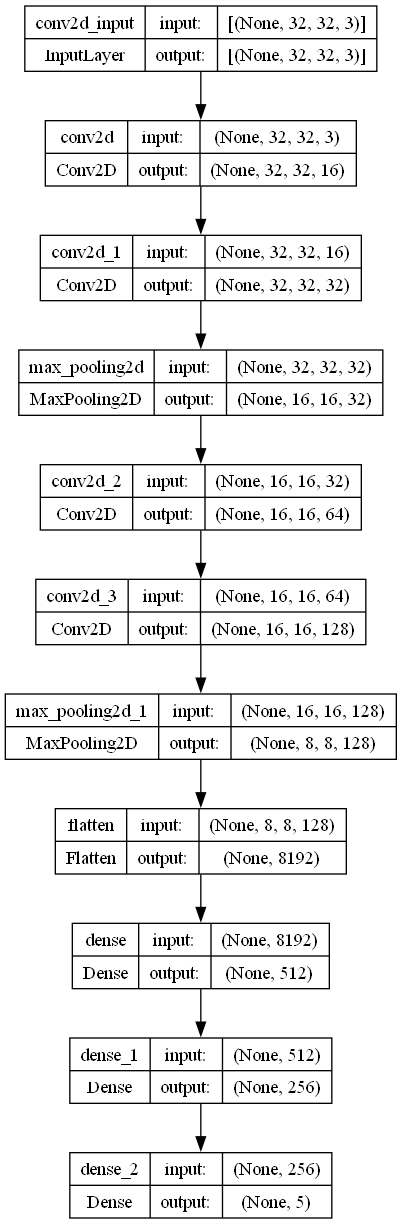

In [10]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

## 4. Training the Model  


Fits the CNN model using the training data generator for 5 epochs, with validation on test data.

In [11]:
training_hist = conv_model.fit(
    train_data_gen,  # Use the training data generator
    epochs=5,
    steps_per_epoch=train_data_gen.samples // batch_size,  # Number of steps per epoch (total samples / batch size)
    validation_data=test_data_gen,  # Use the testing data generator
    validation_steps=test_data_gen.samples // batch_size  # Number of validation steps
)

Epoch 1/5


c:\Users\marie\anaconda3\envs\ml_env_3\lib\site-packages\keras\src\backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 67s 2s/step - loss: 1.3769 - accuracy: 0.4127 - val_loss: 1.1553 - val_accuracy: 0.4900
Epoch 2/5
39/39 [==============================] - 16s 404ms/step - loss: 0.9413 - accuracy: 0.6273 - val_loss: 0.9551 - val_accuracy: 0.6083
Epoch 3/5
39/39 [==============================] - 16s 410ms/step - loss: 0.8257 - accuracy: 0.6819 - val_loss: 0.9583 - val_accuracy: 0.5826
Epoch 4/5
39/39 [==============================] - 17s 425ms/step - loss: 0.7848 - accuracy: 0.6993 - val_loss: 0.8625 - val_accuracy: 0.6306
Epoch 5/5
39/39 [==============================] - 18s 458ms/step - loss: 0.6732 - accuracy: 0.7408 - val_loss: 0.8360 - val_accuracy: 0.6306


### Plotting Training Performance  


Plots training and validation accuracy and loss over epochs to visualize model performance.

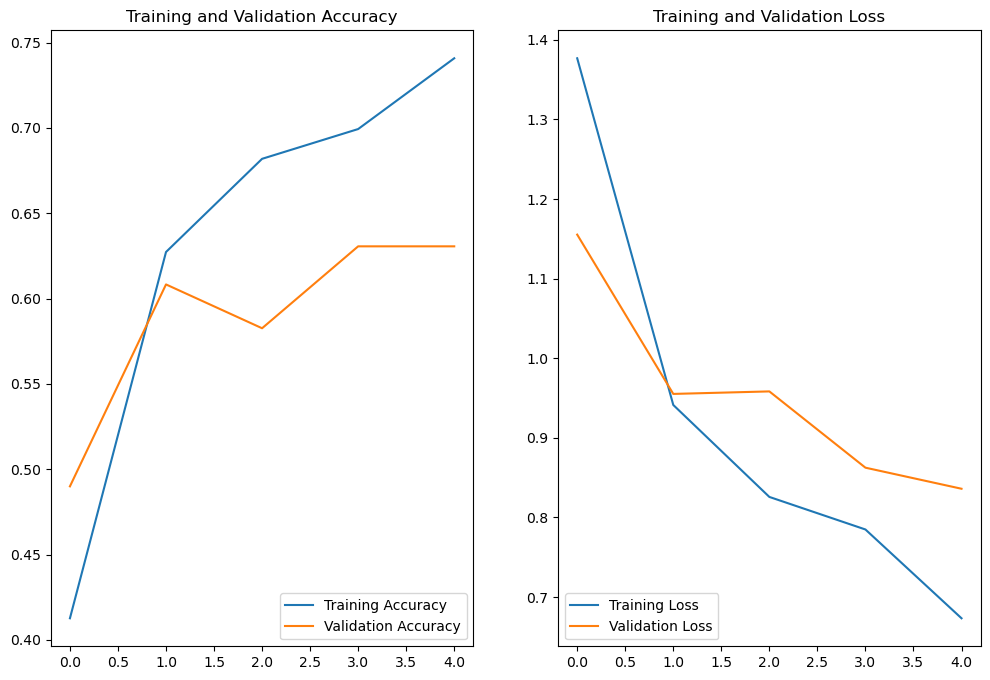

In [16]:
import matplotlib.pyplot as plt

acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss')
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image


## 5. Testing the Model on a Sample Image  


Retrieves an image from the test data generator, displays it, and predicts its class using the trained model.








In [18]:
def perform_test(model, test_data_gen):
    # Get a batch of data from the test generator
    test_batch = next(test_data_gen)  # Get the next batch from the generator
    test_img = test_batch[0][0]  # Get the first image in the batch
    test_label = test_batch[1][0]  # Get the first label in the batch
    test_label_index = np.argmax(test_label)  # Get the index of the '1' in the one-hot vector
# Display the image
    plt.imshow(test_img)
    plt.show()

    test_img1 = np.expand_dims(test_img, axis=0)
    result = model.predict(test_img1)

    print('Actual label: ', lookup[int(test_label_index)])
    print('Predicted label: ', lookup[np.argmax(result)])




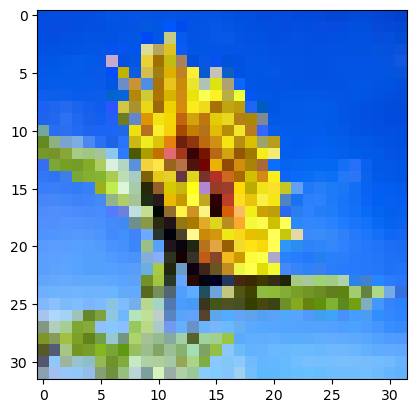

1/1 [==============================] - 0s 133ms/step
Actual label:  Sunflower
Predicted label:  Sunflower


In [19]:
perform_test(conv_model, test_data_gen)


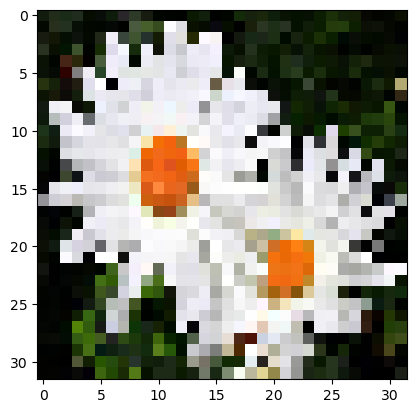

1/1 [==============================] - 0s 26ms/step
Actual label:  Daisy
Predicted label:  Daisy


In [21]:
perform_test(conv_model, test_data_gen)


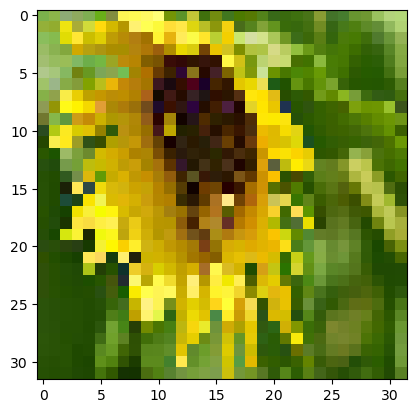

1/1 [==============================] - 0s 27ms/step
Actual label:  Sunflower
Predicted label:  Sunflower


In [22]:
perform_test(conv_model, test_data_gen)


## 6. Advanced Data Augmentation  


Enhances model generalization by applying rescaling and horizontal flipping. Displays a sample image to verify augmentation.

Found 5000 images belonging to 5 classes.


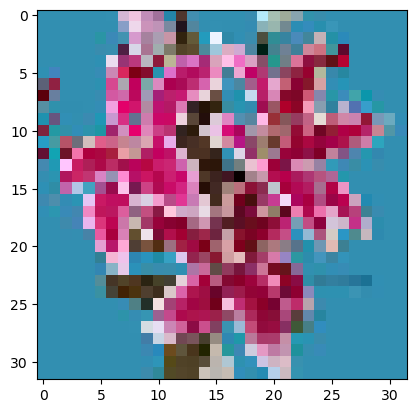

In [23]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))


plt.imshow(train_data_gen[0][0][0])

Improves model generalization by rescaling images and applying random rotations up to 60°. Displays a sample image to verify augmentation.


Found 5000 images belonging to 5 classes.


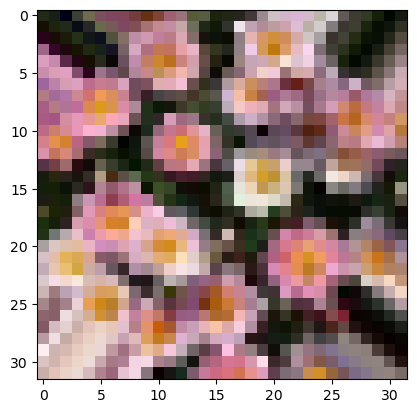

In [24]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=60)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Enhances model robustness by rescaling images and applying random zooming up to 50%. Displays a sample image to verify augmentation.

Found 5000 images belonging to 5 classes.


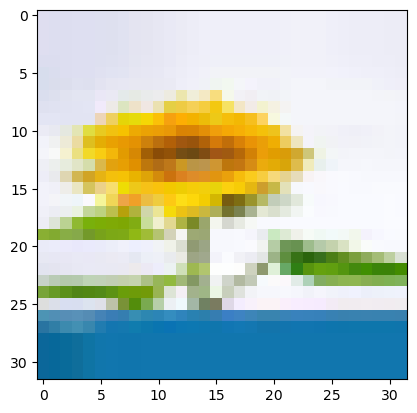

In [25]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Applies multiple transformations—rescaling, rotation (30°), shifting (5%), horizontal flipping, and zooming (30%)—to improve model generalization. Displays a sample image to verify augmentation.

Found 5000 images belonging to 5 classes.


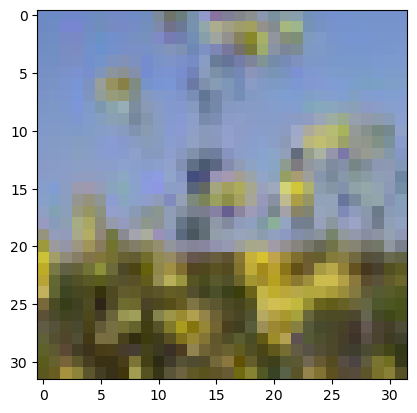

In [26]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=.05,
    height_shift_range=.05,
    horizontal_flip=True,
    zoom_range=0.3
)

train_data_gen_aug = image_gen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(32, 32))

plt.imshow(train_data_gen_aug[0][0][0])

## 7. CNN Model with Dropout  


Defines a Convolutional Neural Network (CNN) with dropout layers to reduce overfitting. The model includes convolutional layers, pooling layers, fully connected layers, and a final softmax output for classification.


In [27]:
conv_model_with_dropout = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),

    layers.Dropout(0.25),

    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')

])

In [28]:
conv_model_with_dropout.compile(optimizer='adam',
                                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                metrics=['accuracy'])

Trains the model for 5 epochs using the training data, while validating performance on the test set to monitor overfitting.

In [30]:
training_hist = conv_model_with_dropout.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=len(train_data_gen),  
    validation_data=test_data_gen,
    validation_steps=len(test_data_gen)   
)

Epoch 1/5


c:\Users\marie\anaconda3\envs\ml_env_3\lib\site-packages\keras\src\backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 23s 549ms/step - loss: 1.3304 - accuracy: 0.4218 - val_loss: 1.3055 - val_accuracy: 0.3987
Epoch 2/5
40/40 [==============================] - 22s 553ms/step - loss: 1.0034 - accuracy: 0.5900 - val_loss: 1.0924 - val_accuracy: 0.4958
Epoch 3/5
40/40 [==============================] - 22s 556ms/step - loss: 0.8846 - accuracy: 0.6402 - val_loss: 0.9919 - val_accuracy: 0.5532
Epoch 4/5
40/40 [==============================] - 22s 542ms/step - loss: 0.8429 - accuracy: 0.6586 - val_loss: 0.9162 - val_accuracy: 0.5772
Epoch 5/5
40/40 [==============================] - 22s 555ms/step - loss: 0.7783 - accuracy: 0.6870 - val_loss: 0.8259 - val_accuracy: 0.6086


### Evaluating Training Performance  


Plots accuracy and loss curves for both training and validation data over 5 epochs to assess model performance and detect overfitting.


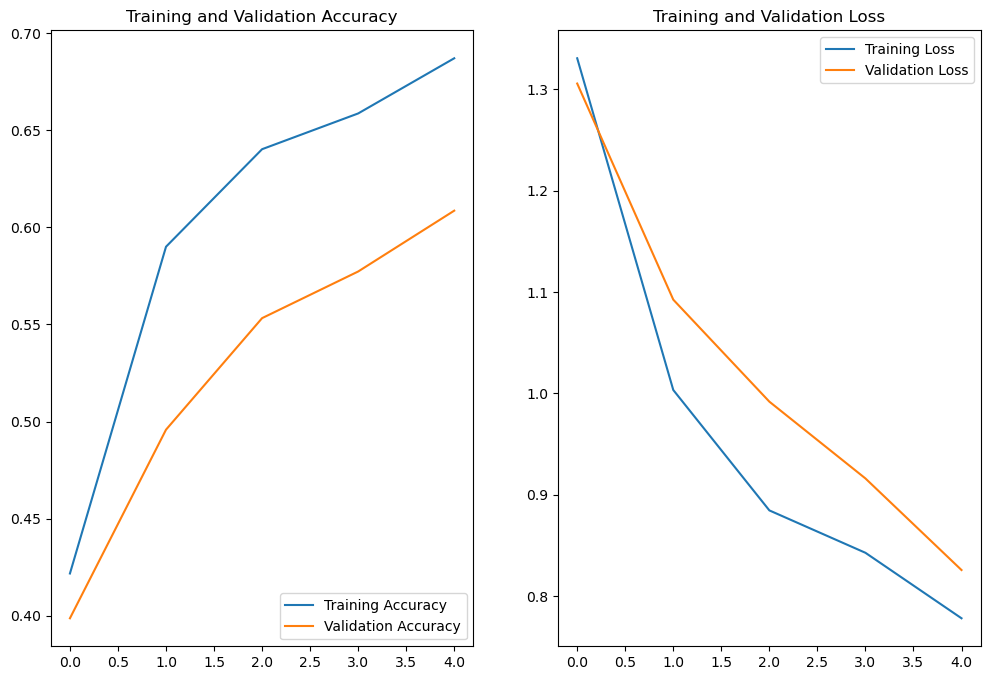

In [31]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss=training_hist.history['loss']
val_loss=training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

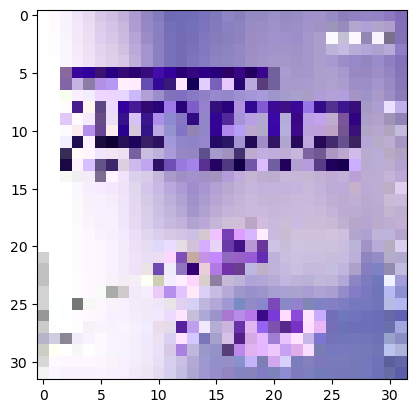

1/1 [==============================] - 0s 26ms/step
Actual label:  Lavender
Predicted label:  Lavender


In [35]:
perform_test(conv_model_with_dropout,test_data_gen)

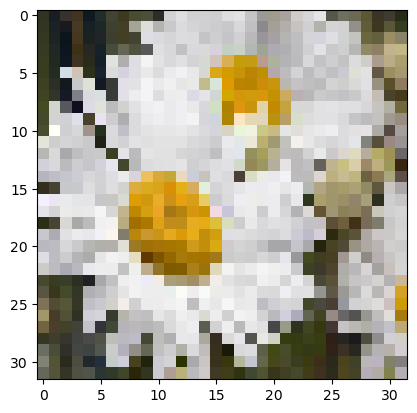

1/1 [==============================] - 0s 25ms/step
Actual label:  Daisy
Predicted label:  Daisy


In [36]:
perform_test(conv_model_with_dropout,test_data_gen)

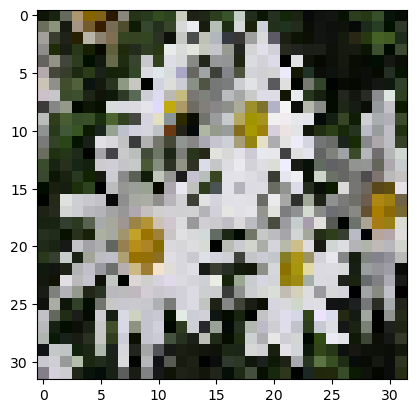

1/1 [==============================] - 0s 21ms/step
Actual label:  Daisy
Predicted label:  Daisy


In [37]:
perform_test(conv_model_with_dropout,test_data_gen)

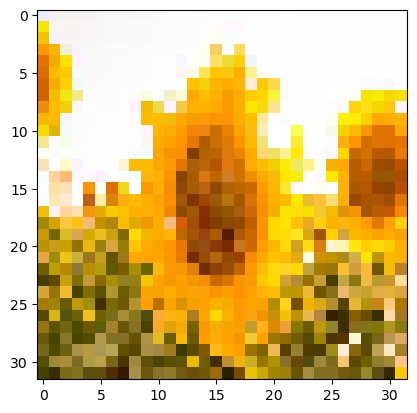

1/1 [==============================] - 0s 24ms/step
Actual label:  Sunflower
Predicted label:  Sunflower


In [38]:
perform_test(conv_model_with_dropout,test_data_gen)